# Import libraries

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg

plt.style.use('seaborn-darkgrid')

# Load the Dataset

In [7]:
df = pd.read_csv('RaceCovidPer100K.csv', index_col = 0)
df.head()

,State,cases,White Cases Per 100K,Black or African American Cases Per 100K,Asian Cases Per 100K,American Indian and Alaska Native Cases Per 100K,Native Hawaiian and Other Pacific Islander Cases Per 100K,Hispanic or Latino Cases Per 100K
0,Alaska,1479,133.388122,138.905425,135.831483,158.928267,490.072883,120.873625
1,Alabama,53587,547.169229,1350.379483,331.822721,0.000000,0.000000,2618.921519
2,Arkansas,28367,587.226204,1322.928572,830.739463,353.205098,18546.499255,3957.416329
3,Arizona,122467,355.871250,805.434977,383.818256,2354.211598,0.000000,4315.934781
4,California,320804,155.004880,394.990914,214.254365,147.295833,798.130205,1513.256583


In [8]:
df.shape

(51, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   State                                                      51 non-null     object 
 1   cases                                                      51 non-null     int64  
 2   White Cases Per 100K                                       51 non-null     float64
 3   Black or African American Cases Per 100K                   51 non-null     float64
 4   Asian Cases Per 100K                                       51 non-null     float64
 5   American Indian and Alaska Native Cases Per 100K           51 non-null     float64
 6   Native Hawaiian and Other Pacific Islander Cases Per 100K  51 non-null     float64
 7   Hispanic or Latino Cases Per 100K                          51 non-null     float64
dtypes: float64(6)

In [10]:
df.isnull().sum()

State                                                        0
cases                                                        0
White Cases Per 100K                                         0
Black or African American Cases Per 100K                     0
Asian Cases Per 100K                                         0
American Indian and Alaska Native Cases Per 100K             0
Native Hawaiian and Other Pacific Islander Cases Per 100K    0
Hispanic or Latino Cases Per 100K                            0
dtype: int64

In [11]:
df.describe()

,cases,White Cases Per 100K,Black or African American Cases Per 100K,Asian Cases Per 100K,American Indian and Alaska Native Cases Per 100K,Native Hawaiian and Other Pacific Islander Cases Per 100K,Hispanic or Latino Cases Per 100K
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,64293.196078,351.881271,1167.716405,586.872911,685.239011,1359.279505,2698.876479
std,84988.297240,206.340194,978.872464,804.862571,1346.868283,3228.319472,2159.630864
min,1220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12129.000000,179.794841,526.365691,210.441636,0.000000,0.000000,1101.236076
50%,35712.000000,355.871250,993.146649,424.434088,303.832970,0.000000,2452.073327
75%,74942.500000,491.692257,1490.549541,602.306790,562.047789,1161.112686,4011.744147
max,401706.000000,795.193702,5168.704413,4759.368968,8349.705305,18546.499255,8536.145835


## Pearson Correlation

In [12]:
Pcorr = df.corr(method = 'pearson')
Pcorr

,cases,White Cases Per 100K,Black or African American Cases Per 100K,Asian Cases Per 100K,American Indian and Alaska Native Cases Per 100K,Native Hawaiian and Other Pacific Islander Cases Per 100K,Hispanic or Latino Cases Per 100K
cases,1.000000,-0.157024,-0.228198,-0.208824,-0.155850,-0.080435,-0.030797
White Cases Per 100K,-0.157024,1.000000,0.454018,0.406992,0.227224,0.363602,0.794059
Black or African American Cases Per 100K,-0.228198,0.454018,1.000000,0.659710,0.168625,0.179256,0.408531
Asian Cases Per 100K,-0.208824,0.406992,0.659710,1.000000,0.231122,0.239859,0.431328
American Indian and Alaska Native Cases Per 100K,-0.155850,0.227224,0.168625,0.231122,1.000000,0.114902,0.184514
Native Hawaiian and Other Pacific Islander Cases Per 100K,-0.080435,0.363602,0.179256,0.239859,0.114902,1.000000,0.350915
Hispanic or Latino Cases Per 100K,-0.030797,0.794059,0.408531,0.431328,0.184514,0.350915,1.000000


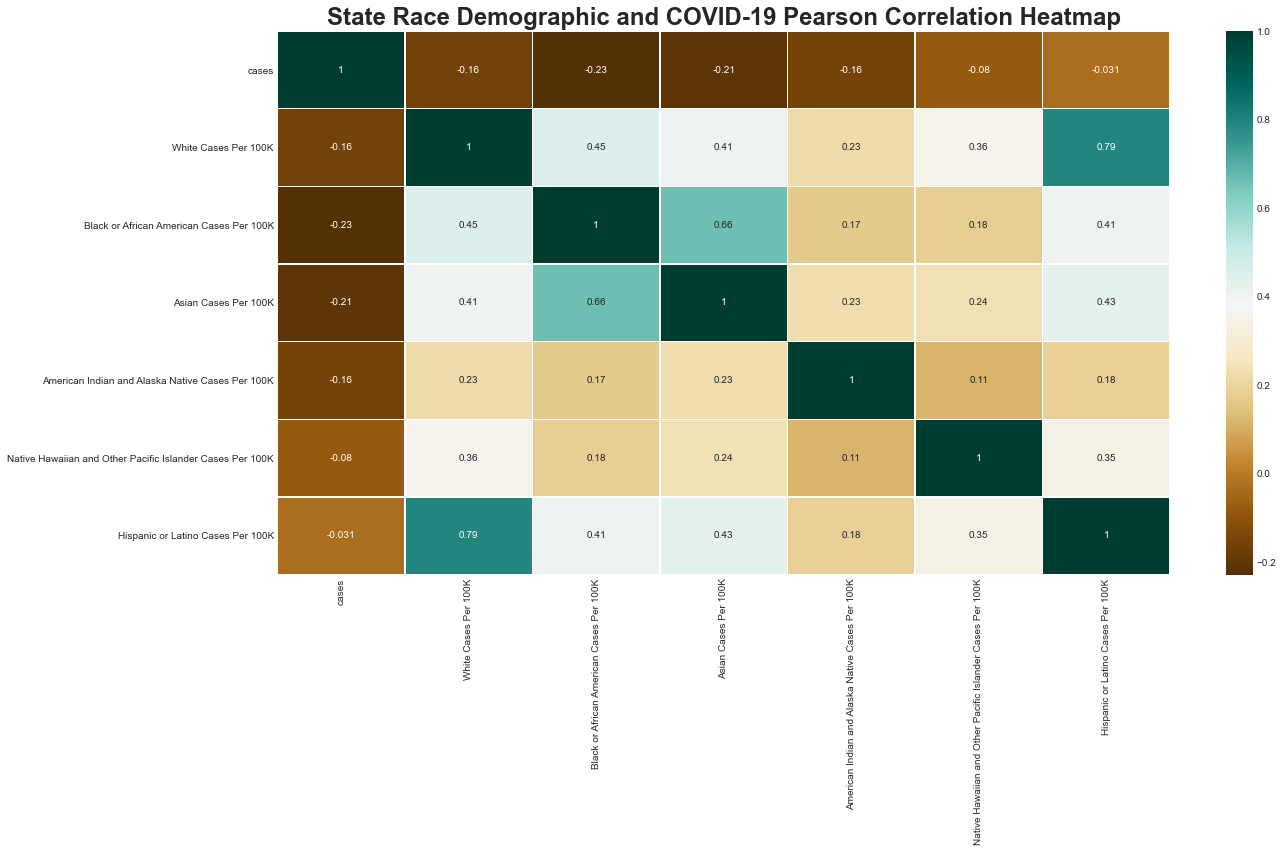

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

In [14]:
Kcorr = df.corr(method = 'kendall')
Kcorr

,cases,White Cases Per 100K,Black or African American Cases Per 100K,Asian Cases Per 100K,American Indian and Alaska Native Cases Per 100K,Native Hawaiian and Other Pacific Islander Cases Per 100K,Hispanic or Latino Cases Per 100K
cases,1.000000,0.135061,-0.014134,-0.022144,-0.102002,-0.040584,0.197639
White Cases Per 100K,0.135061,1.000000,0.555031,0.449734,0.150672,0.102547,0.585733
Black or African American Cases Per 100K,-0.014134,0.555031,1.000000,0.486156,0.182481,0.123830,0.467483
Asian Cases Per 100K,-0.022144,0.449734,0.486156,1.000000,0.382746,0.272816,0.374755
American Indian and Alaska Native Cases Per 100K,-0.102002,0.150672,0.182481,0.382746,1.000000,0.400695,0.265244
Native Hawaiian and Other Pacific Islander Cases Per 100K,-0.040584,0.102547,0.123830,0.272816,0.400695,1.000000,0.197900
Hispanic or Latino Cases Per 100K,0.197639,0.585733,0.467483,0.374755,0.265244,0.197900,1.000000


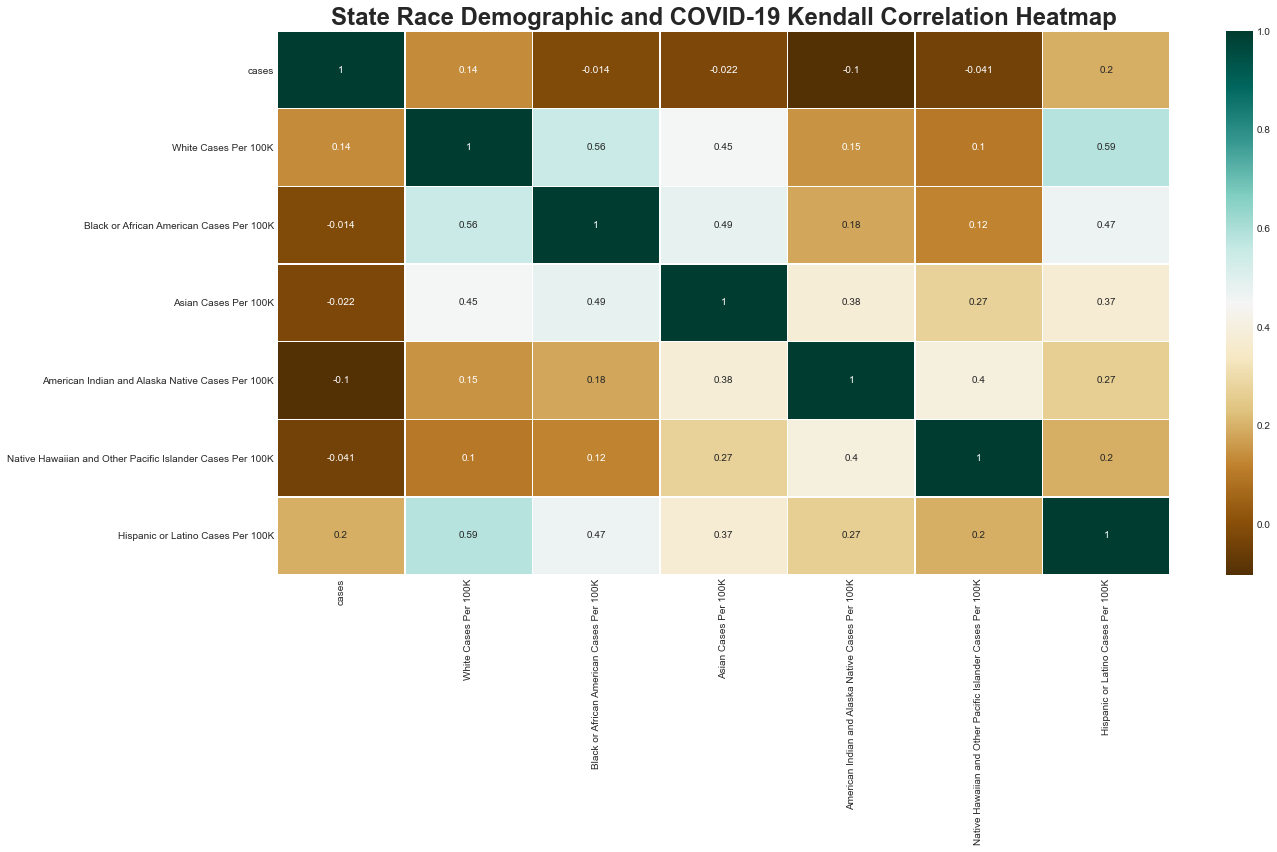

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

In [16]:
Scorr = df.corr(method = 'spearman')
Scorr

,cases,White Cases Per 100K,Black or African American Cases Per 100K,Asian Cases Per 100K,American Indian and Alaska Native Cases Per 100K,Native Hawaiian and Other Pacific Islander Cases Per 100K,Hispanic or Latino Cases Per 100K
cases,1.000000,0.200652,-0.016653,-0.003987,-0.136649,-0.054196,0.270620
White Cases Per 100K,0.200652,1.000000,0.706372,0.619665,0.204599,0.127516,0.778703
Black or African American Cases Per 100K,-0.016653,0.706372,1.000000,0.612053,0.240789,0.139836,0.620156
Asian Cases Per 100K,-0.003987,0.619665,0.612053,1.000000,0.506888,0.341271,0.483365
American Indian and Alaska Native Cases Per 100K,-0.136649,0.204599,0.240789,0.506888,1.000000,0.462499,0.343421
Native Hawaiian and Other Pacific Islander Cases Per 100K,-0.054196,0.127516,0.139836,0.341271,0.462499,1.000000,0.253906
Hispanic or Latino Cases Per 100K,0.270620,0.778703,0.620156,0.483365,0.343421,0.253906,1.000000


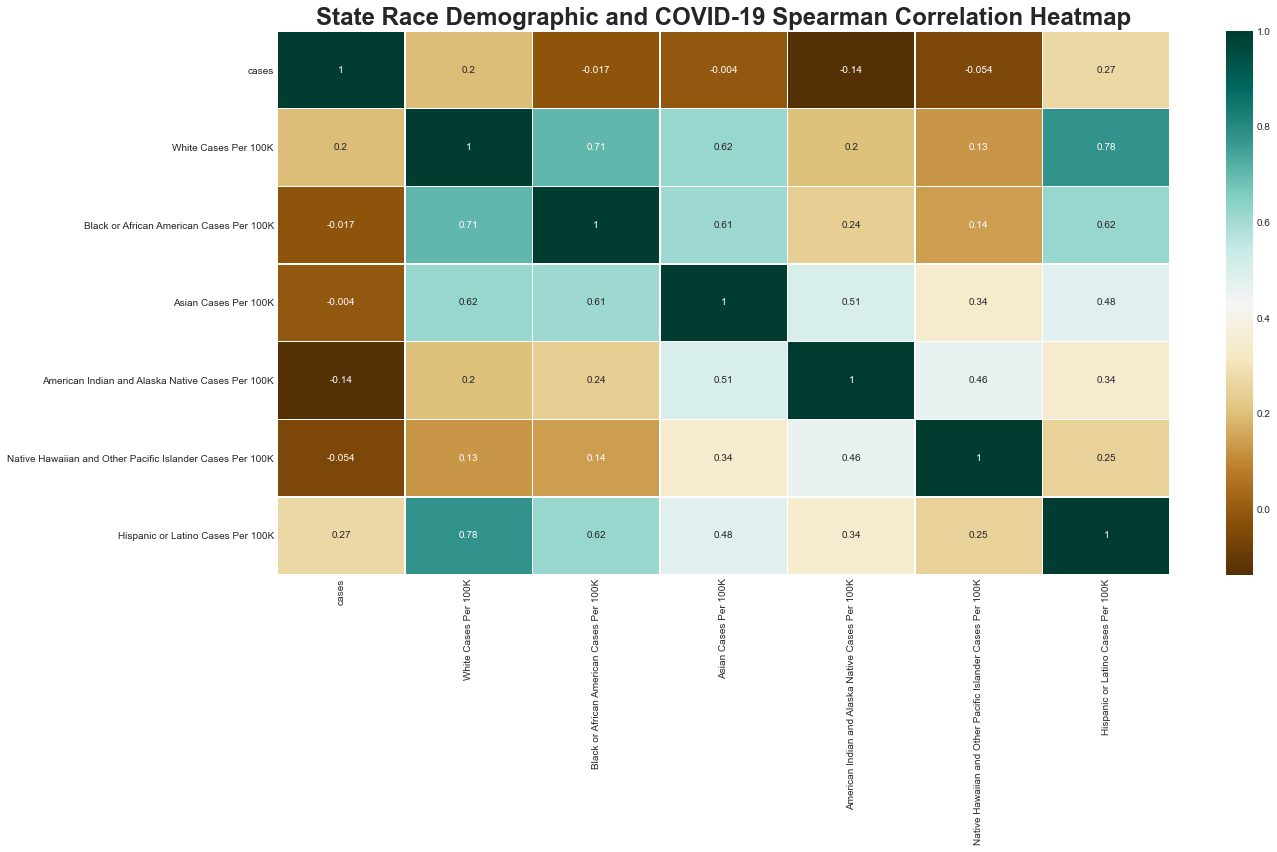

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [21]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Ethnicity'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop(0)
AllCorr = AllCorr.reset_index(drop = True)

AllCorr

,Ethnicity,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,White Cases Per 100K,-0.157024,0.135061,0.200652
1,Black or African American Cases Per 100K,-0.228198,-0.014134,-0.016653
2,Asian Cases Per 100K,-0.208824,-0.022144,-0.003987
3,American Indian and Alaska Native Cases Per 100K,-0.155850,-0.102002,-0.136649
4,Native Hawaiian and Other Pacific Islander Cas...,-0.080435,-0.040584,-0.054196
5,Hispanic or Latino Cases Per 100K,-0.030797,0.197639,0.270620


In [24]:
AllCorr.to_csv('All Races Per 100K Correlation.csv')

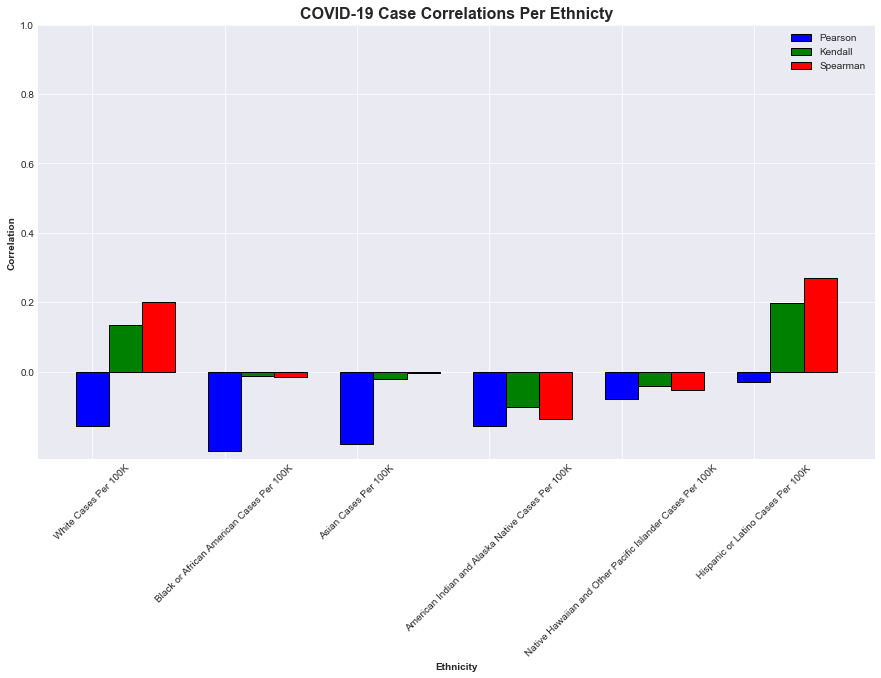

In [22]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Ethnicity'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Ethnicty', fontsize = 16, fontweight = 'bold')

plt.xlabel('Ethnicity', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

In [23]:
model1 = sm.OLS(df['cases'], df[['White Cases Per 100K','Black or African American Cases Per 100K',
                                 'American Indian and Alaska Native Cases Per 100K','Asian Cases Per 100K',
                                 'Native Hawaiian and Other Pacific Islander Cases Per 100K',
                                 'Hispanic or Latino Cases Per 100K']]).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.248
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              2.470
Date:                Tue, 14 Jul 2020   Prob (F-statistic):                      0.0377
Time:                        14:50:23   Log-Likelihood:                         -655.19
No. Observations:                  51   AIC:                                      1322.
Df Residuals:                      45   BIC:                                      1334.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
White Cases Per 100K                                         81.9335    100.614      0.814      0.420    -120.714     284.581
Black or African American Cases Per 100K                      4.9817     18.892      0.264      0.793     -33.069      43.032
American Indian and Alaska Native Cases Per 100K             -4.0960     10.659     -0.384      0.703     -25.565      17.373
Asian Cases Per 100K                                        -21.9157     23.708     -0.924      0.360     -69.666      25.835
Native Hawaiian and Other Pacific Islander Cases Per 100K    -2.1488      4.635     -0.464      0.645     -11.485       7.187
Hispanic or Latino Cases Per 100K                             9.7343     10.765      0.904      0.371     -11.948      31.417
==============================================================================
Omnibus:                       43.513   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.360
Skew:                           2.393   Prob(JB):                     2.01e-31
Kurtosis:                       9.604   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""